# Words, words, words

In [15]:
%matplotlib inline

from slf.fake import SynFits, print_res

from slf.core.db import SLFDB
from slf.core.io import load_pickle
from slf.plts.fake import *

In [2]:
# Housekeeping
db = SLFDB()

In [3]:
# Check available synthetic fit files
syn_files = db.check_syns()

#### WORDS

In [30]:
# Collect all fits together
all_fits = SynFits()
all_fits.get_fit_funcs()
all_fits.get_err_dict(0)

for f_name in syn_files:

    dat = load_pickle(f_name, db.syns_path)

    temp = SynFits()
    temp.errs = dat
    
    all_fits = all_fits + temp

In [32]:
# Check how many PSDs are included in synthetic fits
print(len(all_fits.errs['EXP']))

3600


In [33]:
# Check the average errors per method
print_res(all_fits.calc_avg_errs(avg='median'))

   RLM-EO   		 0.03380
   RAN-EO   		 0.04171
   EXP-EO   		 0.04171
   FOOOF    		 0.05422
   RAN-EA   		 0.06861
   RLM-EA   		 0.06953
   RLM      		 0.09061
   RAN      		 0.09238
   EXP-EA   		 0.11451
   EXP      		 0.15734
   OLS      		 0.15734


In [34]:
# Check the number of fits that pass a threshold, per method
print_res(all_fits.calc_perc_good(thresh=0.05))

   RLM-EO   		 0.60250
   EXP-EO   		 0.56667
   RAN-EO   		 0.54778
   FOOOF    		 0.48472
   RLM-EA   		 0.43972
   RAN-EA   		 0.40917
   RAN      		 0.38833
   RLM      		 0.38222
   EXP-EA   		 0.32583
   OLS      		 0.22278
   EXP      		 0.22278


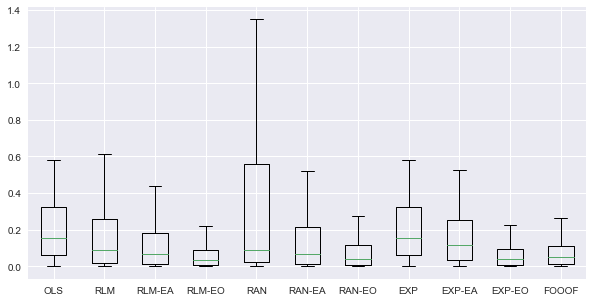

In [35]:
# Create boxplot of errors
boxplot_errors(all_fits.errs)

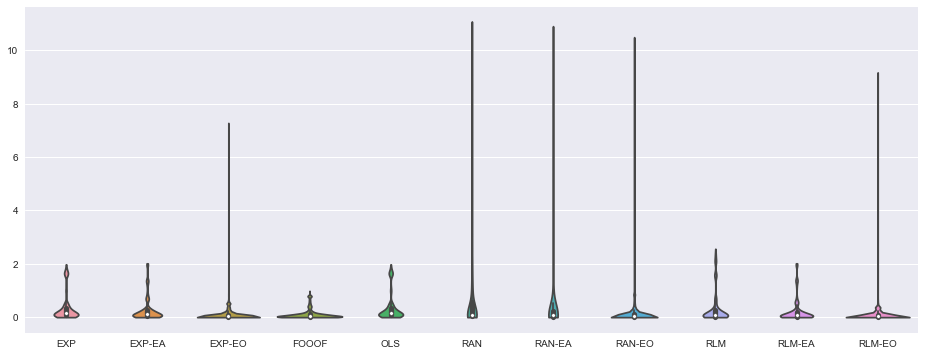

In [36]:
# Violin plot of error distributions
violin_errors(all_fits.errs)

## Statistically Compare Methods

In [37]:
# Run comparisons between methods
comps = all_fits.comp_errs()

In [38]:
# Print out color-coded dataframe of comparison results
from slf.plts.fake import _color_red_or_green
df = pd.DataFrame(comps, index=all_fits.errs.keys(), columns=all_fits.errs.keys())
df.style.applymap(_color_red_or_green)

,OLS,RLM,RLM-EA,RLM-EO,RAN,RAN-EA,RAN-EO,EXP,EXP-EA,EXP-EO,FOOOF
OLS,1,1.81042e-47,1.41743e-103,0,5.13302e-12,2.30129e-81,1.50929e-262,0.907525,1.15682e-20,1.62987e-305,2.14163e-219
RLM,1.81042e-47,1,2.63993e-13,9.1552e-119,4.19733e-12,2.80866e-05,2.4583e-70,1.81445e-47,7.17082e-10,7.10672e-91,3.84381e-48
RLM-EA,1.41743e-103,2.63993e-13,1,4.52348e-58,2.13925e-41,0.00113325,2.88652e-23,1.41743e-103,1.40149e-42,9.19607e-36,3.07667e-12
RLM-EO,0,9.1552e-119,4.52348e-58,1,5.45494e-182,3.67262e-80,2.68366e-11,0,8.82906e-220,7.86573e-06,5.07775e-26
RAN,5.13302e-12,4.19733e-12,2.13925e-41,5.45494e-182,1,1.8373e-26,2.8445e-127,5.14472e-12,0.587887,2.66487e-152,9.20061e-98
RAN-EA,2.30129e-81,2.80866e-05,0.00113325,3.67262e-80,1.8373e-26,1,8.37678e-42,2.30129e-81,3.91918e-27,1.27456e-56,7.75203e-21
RAN-EO,1.50929e-262,2.4583e-70,2.88652e-23,2.68366e-11,2.8445e-127,8.37678e-42,1,1.50929e-262,3.03264e-147,0.0190643,7.17751e-06
EXP,0.907525,1.81445e-47,1.41743e-103,0,5.14472e-12,2.30129e-81,1.50929e-262,1,1.15682e-20,1.63056e-305,2.14163e-219
EXP-EA,1.15682e-20,7.17082e-10,1.40149e-42,8.82906e-220,0.587887,3.91918e-27,3.03264e-147,1.15682e-20,1,7.47074e-183,1.88266e-117
EXP-EO,1.62987e-305,7.10672e-91,9.19607e-36,7.86573e-06,2.66487e-152,1.27456e-56,0.0190643,1.63056e-305,7.47074e-183,1,9.67283e-13
